In [103]:
#######################

In [1]:


nuwro = True
ISRUN3 = False


#True for normal, false for stat err
#useWeights = True


In [2]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

#import top 
#from top import *

#importlib.reload(sf)
#from selection_functions import *

Welcome to JupyROOT 6.24/02


In [3]:


fold = "nuselection"
tree = "NeutrinoSelectionFilter"



In [4]:
if nuwro: 
    path = "/media/alex/TOSHIBA EXT/"

In [5]:


if nuwro: 
    overlay = uproot.open(path+"neutrinoselection_filt_run1_overlay_nuwro.root")[fold][tree]
    nue = uproot.open(path+"neutrinoselection_filt_run1_overlay_nuwro_intrinsic.root")[fold][tree]

uproot_v = [overlay,nue]

In [6]:


variables = [
    "selected", "nu_pdg", 
    "trk_score_v", "_opfilter_pe_beam", "_opfilter_pe_veto",
    "shr_tkfit_dedx_Y", "trk_theta", "trk_phi",
    "ccnc", "shr_px", "shr_py", "shr_pz",
    "n_tracks_contained", 
    "NeutrinoEnergy2", "shr_theta", "shr_phi",
    "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
    "true_nu_vtx_x", "true_nu_vtx_y" , "true_nu_vtx_z", 
    "nproton", "nu_e", "n_showers_contained",
    "shr_score", "topological_score",
    "trk_energy", "tksh_distance", "tksh_angle",
    "npi0", "trk_mcs_muon_mom_v", "trk_range_muon_mom_v",
    "shr_energy_tot_cali", "shr_energy_cali", 
    "nslice", "true_nu_vtx_sce_x", "true_nu_vtx_sce_y", "true_nu_vtx_sce_z",
    "contained_fraction",
    "npion", "trk_sce_end_z_v", "trk_sce_end_y_v", "trk_sce_end_x_v",
    "shrmoliereavg", "muon_e", "proton_e",
    "shrsubclusters0","shrsubclusters1","shrsubclusters2", 
    "shr_tkfit_npointsvalid","shr_tkfit_npoints", "true_e_visible", "trkshrhitdist2", 
    "weightSplineTimesTune", "weightTune", "true_nu_px", "true_nu_py", "true_nu_pz", 
    "elec_e", "proton_e", "mc_px", "mc_py", "mc_pz", "elec_px", "elec_py", "elec_pz", 
    "swtrig_pre", "ppfx_cv", "mc_pdg",  'interaction', 'run', "opening_angle"]


variables = list(set(variables))
print(variables)


['opening_angle', 'nu_e', 'selected', 'muon_e', 'shrsubclusters2', 'true_nu_pz', 'mc_pdg', 'trk_score_v', 'trk_range_muon_mom_v', 'nslice', 'shr_tkfit_npoints', 'true_nu_py', 'mc_py', 'shr_pz', 'true_nu_vtx_z', 'elec_pz', 'shr_px', 'NeutrinoEnergy2', 'trk_mcs_muon_mom_v', 'trkshrhitdist2', 'shr_phi', 'shr_energy_cali', 'contained_fraction', 'ccnc', 'true_nu_vtx_sce_z', 'reco_nu_vtx_sce_z', 'elec_e', '_opfilter_pe_veto', 'npion', 'true_nu_vtx_sce_y', 'trk_sce_end_x_v', 'weightTune', 'shr_energy_tot_cali', 'mc_px', 'trk_phi', 'n_showers_contained', 'npi0', 'elec_py', 'weightSplineTimesTune', 'shrmoliereavg', 'trk_sce_end_z_v', 'nproton', 'shr_py', 'trk_sce_end_y_v', 'shr_tkfit_dedx_Y', 'trk_energy', 'true_nu_px', 'n_tracks_contained', 'run', 'reco_nu_vtx_sce_x', '_opfilter_pe_beam', 'proton_e', 'shr_tkfit_npointsvalid', 'reco_nu_vtx_sce_y', 'swtrig_pre', 'tksh_angle', 'interaction', 'true_nu_vtx_y', 'shrsubclusters0', 'trk_theta', 'ppfx_cv', 'true_nu_vtx_x', 'shr_score', 'true_nu_vtx_sce

In [7]:
import load_data_run123

#overlay = overlay.pandas.df(variables, flatten=False)
import time
s = time.time()

#df_v = [overlay]
uproot_v = [overlay]
var_v = [variables]

for ii, CV in enumerate(uproot_v):
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    load_data_run123.process_uproot_numu(CV,CVDF)
    if ii == 0:
        overlay = CVDF

s2 = time.time()
print("runtime = ", s2-s)

trk_llr_pid_v  [[] [] [0.96992034 -0.031569537] ... [0.96793294 0.40650022] [] []]
trk_score_v  [[] [] [0.9998714 0.50025755] ... [1.0 0.35099977] [] []]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


updated proton mask test
runtime =  31.575098991394043


In [8]:


#nue = nue.pandas.df(variables, flatten=False)

import time
s = time.time()

#df_v = [overlay]
uproot_v = [nue]
var_v = [variables]

for ii, CV in enumerate(uproot_v):
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    load_data_run123.process_uproot_numu(CV,CVDF)
    if ii == 0:
        nue = CVDF

s2 = time.time()
print("runtime = ", s2-s)

trk_llr_pid_v  [[-0.78143746 0.38416666] [0.87407523] [0.95106965 0.9559888 0.9254303 0.15696444] ... [] [0.9717339] [0.964979 0.9468219 0.45449623 ... 0.40842512 0.27252463 -0.024122704]]
trk_score_v  [[0.9562631 0.6825045] [0.003897016] [0.20598558 0.9998898 0.8317998 0.6877012] ... [] [0.025898064] [0.0025717707 0.99560267 0.0046345955 ... 0.046564847 0.04777992 0.8479064]]
updated proton mask test
runtime =  27.382797241210938


In [9]:
df_v = [overlay,nue]
uproot_v = [overlay,nue]

In [10]:
for i,df in enumerate(df_v):  
    df["bnbdata"] = np.zeros_like(df["nslice"])
    df["extdata"] = np.zeros_like(df["nslice"])
    print(len(df["extdata"]))

280045
132027


In [11]:
"""
df_v = [overlay,nue]


for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_llr_pid_v = up.array('trk_llr_pid_score_v')
    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result
    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    df['trkpid'] = trk_llr_pid_v_sel
    df['subcluster'] = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']

    df['NeutrinoEnergy2_GeV'] = df['NeutrinoEnergy2']/1000

"""

"\ndf_v = [overlay,nue]\n\n\nfor i,df in enumerate(df_v):\n    up = uproot_v[i]\n    trk_llr_pid_v = up.array('trk_llr_pid_score_v')\n    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result\n    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])\n    df['trkpid'] = trk_llr_pid_v_sel\n    df['subcluster'] = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']\n\n    df['NeutrinoEnergy2_GeV'] = df['NeutrinoEnergy2']/1000\n\n"

In [12]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [13]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [14]:
#RERUN IF CHANGING

isTruth = False

if isTruth == False:

    nue.query("nu_e > 0 and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)\
    and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
    and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
    and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
    and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 \
    and contained_fraction> 0.95 and topological_score > 0.3", inplace=True)

    overlay.query("nu_e > 0 and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)\
    and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
    and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
    and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
    and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 \
    and contained_fraction> 0.95 and topological_score > 0.3", inplace=True)

elif isTruth == True:
    nue.query("nu_e > 0 and swtrig_pre == 1 \
    and true_nu_vtx_sce_x > 10 and true_nu_vtx_sce_x < 246 \
    and true_nu_vtx_sce_y > -106 and true_nu_vtx_sce_y < 106 \
    and true_nu_vtx_sce_z > 10 and true_nu_vtx_sce_z < 1026 \
    and nproton > 0 and npion == 0 and npi0 == 0", inplace=True)#and nu_pdg==14 and ccnc == 0 \

    overlay.query("nu_e > 0 and swtrig_pre == 1 \
    and true_nu_vtx_sce_x > 10 and true_nu_vtx_sce_x < 246 \
    and true_nu_vtx_sce_y > -106 and true_nu_vtx_sce_y < 106 \
    and true_nu_vtx_sce_z > 10 and true_nu_vtx_sce_z < 1026 \
    and nproton > 0 and npion == 0 and npi0 == 0", inplace=True)

In [15]:
#RECO VARIABLE
import time
s = time.time()
#df_v = [numu_mc]
#removeGenieTune = False
#for i,df in enumerate(df_v):
#    print(df['muon_momentum'])

#if track is stopped in fiducial volume
#    then use stoppingmom
#else
#    use other mom
    
#set up this new variable for each one in  the dataframe

#use first value - from looking at the trk_start and nu_reco_vtx values, this should be the muon
for i,df in enumerate(df_v):
    df["muon_mom"] = df["trk_sce_end_z_v"].copy()
    for j, row in df.iterrows():
        if (len(row["muon_mom"]) !=0 ) and (df["trk_sce_end_z_v"][j][0] < 1036.8 and df["trk_sce_end_z_v"][j][0] > 0 and df["trk_sce_end_y_v"][j][0] < 116.5 and df["trk_sce_end_y_v"][j][0] > -116.5 and df["trk_sce_end_x_v"][j][0] < \
         254.8 and df["trk_sce_end_x_v"][j][0] > -1.55):
            df.loc[j, "muon_mom"] = df["trk_range_muon_mom_v"][j][0]
        elif (len(row["muon_mom"]) == 0 ):
            df.loc[j, "muon_mom"] = 0
        else:
            df.loc[j, "muon_mom"] = df["trk_mcs_muon_mom_v"][j][0]  #mcs == multiple coulob scattering
        
print(df["muon_mom"])

print("")    
print("==========================")
s2 = time.time()
print("runetime = ", s2-s)

entry
1174      0.439274
1860      0.191097
2127      0.279706
2271      0.381607
2551      0.213547
            ...   
130889    0.498756
131040    0.222211
131077    0.243831
131632    0.166437
131646    0.324741
Name: muon_mom, Length: 395, dtype: object

runetime =  1.06959867477417


In [16]:
#RECO VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['nu_Angle_Numi_Muon_Reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['trk_theta'],x['trk_phi']) , axis=1)
    df['cosNu_Angle_Numi_Muon_Reco'] = np.cos(df['nu_Angle_Numi_Muon_Reco'])

In [17]:
#TRUE VARIABLE
s = time.time()

for i,df in enumerate(df_v):
    df["muon_px"] = df["ccnc"].copy()
    df["muon_py"] = df["ccnc"].copy()
    df["muon_pz"] = df["ccnc"].copy()
    for j, row in df.iterrows():
        pdg_vector = df["mc_pdg"].loc[j][0]
        px_vector = df["mc_px"].loc[j]
        py_vector = df["mc_py"].loc[j]
        pz_vector = df["mc_pz"].loc[j]
        result = np.where(pdg_vector==13)[0]
        if np.size(result):
            df.loc[j, "muon_px"] = px_vector[result][0]
            df.loc[j, "muon_py"] = py_vector[result][0]
            df.loc[j, "muon_pz"] = pz_vector[result][0]   
            
    #print(df["muon_px"])

print("")    
print("==========================")
s2 = time.time()
print("runetime = ", s2-s)


runetime =  1.319685935974121


In [18]:
#TRUE VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['targetP']     = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'] + df['muon_pz']*df['muon_pz'])
    df['targetPt']    = np.sqrt(df['muon_px']*df['muon_px'] + df['muon_py']*df['muon_py'])
    df['targetTheta'] = np.arccos(df['muon_pz']/df['targetP'] )
    df['targetPhi']   = np.arctan2(df['muon_py'],df['muon_px'])
    df['nu_Angle_Numi_Muon'] = df.apply( lambda x: angleFromNuMITarget(x['true_nu_vtx_sce_x'],x['true_nu_vtx_sce_y'],x['true_nu_vtx_sce_z'], x['targetTheta'],x['targetPhi']) , axis=1)
    df['cosNu_Angle_Numi_Muon'] = np.cos(df['nu_Angle_Numi_Muon'])

In [19]:
######################### plot categories ##############################
# everything must pass software trigger ! 

in_fv_query = "10<=true_nu_vtx_x<=246 and -106<=true_nu_vtx_y<=106 and 10<=true_nu_vtx_z<=1026"
out_fv_query = "((true_nu_vtx_x<10 or true_nu_vtx_x>246) or (true_nu_vtx_y<-106 or true_nu_vtx_y>106) or (true_nu_vtx_z<10 or true_nu_vtx_z>1026))"

nue_CC_Npi0 = 'swtrig_pre==1 and ((nu_pdg==12 or nu_pdg==-12) and ccnc==0 and npi0>=1)'
nue_CC_0pi0 = 'swtrig_pre==1 and ((nu_pdg==12 or nu_pdg==-12) and ccnc==0 and npi0==0)'

nue_NC_Npi0 = 'swtrig_pre==1 and ((nu_pdg==12 or nu_pdg==-12) and ccnc==1 and npi0>=1)'
nue_NC_0pi0 = 'swtrig_pre==1 and ((nu_pdg==12 or nu_pdg==-12) and ccnc==1 and npi0==0)'

numubar_1eNp = 'swtrig_pre==1 and ((nu_pdg==-14 and ccnc==0 and nproton>0 and npion==0 and npi0==0))'
numu_NC = 'swtrig_pre==1 and ((nu_pdg==14 or nu_pdg==-14) and ccnc==1)'

numu_CCother = 'swtrig_pre==1 and (((nu_pdg==14 and ccnc==0) and (nproton==0 or npi0>0 or npion>0)) or (nu_pdg==-14 and ccnc==0 and (nproton==0 or npion>0 or npi0>0)))'

# less specific categories 
numu_other = 'swtrig_pre==1 and (((nu_pdg==14 or nu_pdg==-14) and ccnc==1) or (((nu_pdg==14 and ccnc==0) and (nproton==0 or npi0>0 or npion>0)) or (nu_pdg==-14 and ccnc==0)))'
nue_Npi0 = 'swtrig_pre==1 and ( (nu_pdg==12 or nu_pdg==-12) and npi0>=1)'
nue_0pi0 = 'swtrig_pre==1 and ( (nu_pdg==12 or nu_pdg==-12) and npi0==0)'

# signal vs. not signal 
signal = in_fv_query+' and  swtrig_pre==1 and (nu_pdg==14 and ccnc==0 and nproton>0 and npion==0 and npi0==0)'
not_signal = "(swtrig_pre==0) or (swtrig_pre==1 and (" + out_fv_query+' or (nu_pdg!=14) or (nu_pdg==14 and ccnc==1) or (nu_pdg==12 and ccnc==0 and (nproton==0 or npi0>0 or npion>0)) ))'

# for replacing nue CC 
in_AV_query = "-1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8"
nueCC_query = 'abs(nu_pdg)==12 and ccnc==0 and '+in_AV_query

In [20]:
overlay = overlay.query('swtrig_pre==1')
nue = nue.query('swtrig_pre==1')

In [21]:
mc_df = [overlay, nue]

In [22]:
def addAngles(df): #From Katrina
    
    ## rotation matrix -- convert detector to beam coordinates
    R = [
        [0.921,   4.625e-05,     -0.3895],
        [0.02271,    0.9983,     0.05383],
        [0.3888,   -0.05843,      0.9195]
    ]
    det_origin_beamcoor = [5502.0, 7259.0,  67270.0]
     
    # angles in detector coordinates
    df['thdet'] = np.arctan2(((df['true_nu_px']*df['true_nu_px'])+(df['true_nu_py']*df['true_nu_py']))**(1/2), df['true_nu_pz'])*(180/math.pi)
    df['phidet'] = np.arctan2(df['true_nu_py'], df['true_nu_px'])*(180/math.pi)
        
    # get true momentum in beam coordinates
    df['true_nu_px_beam'] = R[0][0]*df['true_nu_px'] + R[0][1]*df['true_nu_py'] + R[0][2]*df['true_nu_pz']
    df['true_nu_py_beam'] = R[1][0]*df['true_nu_px'] + R[1][1]*df['true_nu_py'] + R[1][2]*df['true_nu_pz']
    df['true_nu_pz_beam'] = R[2][0]*df['true_nu_px'] + R[2][1]*df['true_nu_py'] + R[2][2]*df['true_nu_pz']
    
    # angles in beam coordinates
    df['thbeam'] = np.arctan2(((df['true_nu_px_beam']*df['true_nu_px_beam'])+(df['true_nu_py_beam']*df['true_nu_py_beam']))**(1/2), df['true_nu_pz_beam'])*(180/math.pi)
    df['phibeam'] = np.arctan2(df['true_nu_py_beam'], df['true_nu_px_beam'])*(180/math.pi)
        
    return df

In [23]:
# use offline flux weights
def offline_flux_weights(df, ISRUN3): 
    
    if ISRUN3: 
        print("No ppfx maps for RHC!")
    
    else: 
        f = ROOT.TFile.Open(path+"ppfx_maps.root", "READ")
    
    numu_map = f.Get("numu_ratio")
    numubar_map = f.Get("numubar_ratio")
    nue_map = f.Get("nue_ratio")
    nuebar_map = f.Get("nuebar_ratio")
    
    nu_flav = list(df['nu_pdg'])
    angle = list(df['thbeam'])
    true_energy = list(df['nu_e'])

    fluxweights = []

    for i in range(len(nu_flav)): 
        if nu_flav[i]==14: 
            h = numu_map
        elif nu_flav[i]==-14: 
            h = numubar_map
        elif nu_flav[i]==12: 
            h = nue_map
        elif nu_flav[i]==-12: 
            h = nuebar_map
        else: 
            print("No map to match PDG code!")
        
        fluxweights.append( h.GetBinContent(h.FindBin(true_energy[i], angle[i])) )

    df['ppfx_cv'] = fluxweights
    #mc_df[0]['weightFlux'] = fluxweights
    #mc_df[1]['weightFlux'] = [1 for i in range(len(mc_df[1]))] # for now 
    
    f.Close()
    
    return df

In [24]:


for i,df in enumerate(mc_df):
    
    # is signal bool 
    df['is_signal'] = np.where((df.swtrig_pre == 1)
                             & (df.nu_pdg==14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                             & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    # Add truth level theta & phi angles (detector & beam coordinates)
    df = addAngles(df)
    
    # add binned ppfx weights
    if nuwro: 
        df = offline_flux_weights(df, ISRUN3)
    



In [25]:
print(len(nue.query('is_signal==True'))==len(nue.query(signal)))
print(len(nue.query('is_signal==False'))==len(nue.query(not_signal)))

print(len(nue.query('is_signal==False')))
print(len(nue.query(not_signal)))

True
True
395
395


In [26]:


# clean bad weights & values 

for i,df in enumerate(mc_df):
     
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.
    
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.  

     



In [27]:
# scale down the number of events to match data POT 

#nue = nue[:round(len(nue)*0.0119)]   #1519
#overlay = overlay[:round(len(overlay)*0.301)]  #67370

#print(len(nue))



#print(len(nue[:round(len(nue)*0.0119)]))
#print(len(overlay[:round(len(overlay)*0.301)]))

#nue = nue[round(len(nue)*0.0119):round((len(nue)*0.0119)*2) ]   #1519
#overlay = overlay[round(len(overlay)*0.301):round((len(overlay)*0.301)*2)]  #67370

print((len(nue)))

395


In [28]:


# POT normalization - scale to data 

if ISRUN3: 
    data_pot = 5.0E20
else: 
    data_pot = 2.0E20

if nuwro==True: 
    overlay['pot_scale'] = data_pot/6.64422e+20
    nue['pot_scale'] = data_pot/1.68375e+22

else: 
    overlay = pot_scale(overlay, 'overlay', ISRUN3)
    nue = pot_scale(nue, 'intrinsic', ISRUN3)
    
    #overlay['pot_scale'] = data_pot/2.33652e+21
    #nue['pot_scale'] = data_pot/2.37838e+22



In [29]:


if nuwro == True: 

    overlay['totweight_data'] = (overlay['pot_scale']*overlay['ppfx_cv'])
    nue['totweight_data'] = (nue['pot_scale']*nue['ppfx_cv'])

else: 
    
    overlay['totweight_data'] = overlay['pot_scale']*overlay['ppfx_cv']*overlay['weightSplineTimesTune']
    nue['totweight_data'] = nue['pot_scale']*nue['ppfx_cv']*nue['weightSplineTimesTune']



In [30]:
################################
#####ONLY RUN THIS CELL ONCE####
################################

print("# of nueCC in AV in overlay sample = "+str(len(overlay.query(nueCC_query))))
len1 = len(overlay)
    
idx = overlay.query(nueCC_query).index
overlay.drop(idx, inplace=True)
len2 = len(overlay) 
print("# of nueCC in AV dropped in overlay = "+str(len1-len2))
    
# then add in nue_intrinsic 
overlay = pd.concat([overlay,nue], ignore_index=True)

# from here on out everything else should be the same. 

# of nueCC in AV in overlay sample = 5
# of nueCC in AV dropped in overlay = 5


In [31]:


# separate by in/out FV & cosmic
infv = overlay.query(in_fv_query)
outfv = overlay.query(out_fv_query)

infv2 = nue.query(in_fv_query)
outfv2 = nue.query(out_fv_query)



In [32]:
# check that everything is accounted for 
print(len(overlay)==len(infv)+len(outfv))

True


In [33]:


tot_signal_weighted = np.nansum(infv.query('is_signal==True')['pot_scale'])
print('total signal events = '+ str(tot_signal_weighted))


tot_signal_weighted = np.nansum(outfv.query('is_signal==True')['pot_scale'])
print('total signal events = '+ str(tot_signal_weighted))


tot_signal_weighted = np.nansum(infv2.query('is_signal==True')['pot_scale'])
print('total signal events = '+ str(tot_signal_weighted))


tot_signal_weighted = np.nansum(outfv2.query('is_signal==True')['pot_scale'])
print('total signal events = '+ str(tot_signal_weighted))



total signal events = 525.5695928190216
total signal events = 0.0
total signal events = 0.0
total signal events = 0.0


In [34]:
datasets = {
    'infv' : infv, 
    'outfv' : outfv
}

In [35]:


generated_events = pd.concat([datasets['outfv'], datasets['infv']])



In [36]:
tot_signal_weighted = np.nansum(generated_events.query('is_signal==True')['pot_scale'])
print('total signal events = '+ str(tot_signal_weighted))

tot_signal_weighted = np.nansum(generated_events.query('is_signal==True')['totweight_data'])
print('total signal events = '+ str(tot_signal_weighted))

tot_signal_weighted = np.nansum(generated_events.query(signal)['totweight_data'])
print('total signal events = '+ str(tot_signal_weighted))

total signal events = 525.5695928190216
total signal events = 473.15817482100346
total signal events = 473.15817482100346


In [37]:
print(isTruth)

if isTruth == False:
    selected_query = "nslice == 1 and ( (_opfilter_pe_beam > 0 \
    and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
    and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
    and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
    and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
    and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 \
    and contained_fraction> 0.95 and topological_score > 0.3"

elif isTruth == True:
    selected_query = "is_signal==True"

False


In [38]:
#datasets_bdt = datasets

datasets_bdt = {}


for i in range(len(datasets)): 

        df = list(datasets.values())[i].copy()
        
        #ANGLE
        tmp = df["cosNu_Angle_Numi_Muon_Reco"].copy()
        mask = (df["cosNu_Angle_Numi_Muon_Reco"] > 1)
        tmp[mask] = 0.9
        df["cosNu_Angle_Numi_Muon_Reco"] = tmp
        print(df["cosNu_Angle_Numi_Muon_Reco"])
        #------
        tmp = df["cosNu_Angle_Numi_Muon_Reco"].copy()
        mask = (df["cosNu_Angle_Numi_Muon_Reco"] < -1)
        tmp[mask] = -0.9
        df["cosNu_Angle_Numi_Muon_Reco"] = tmp
        print(df["cosNu_Angle_Numi_Muon_Reco"])

        #

        #ANGLE
        tmp = df["cosNu_Angle_Numi_Muon"].copy()
        mask = (df["cosNu_Angle_Numi_Muon"] > 1)
        tmp[mask] = 0.9
        df["cosNu_Angle_Numi_Muon"] = tmp
        print(df["cosNu_Angle_Numi_Muon"])
        #------
        tmp = df["cosNu_Angle_Numi_Muon"].copy()
        mask = (df["cosNu_Angle_Numi_Muon"] < -1)
        tmp[mask] = -0.9
        df["cosNu_Angle_Numi_Muon"] = tmp
        print(df["cosNu_Angle_Numi_Muon"])

        datasets_bdt[list(datasets.keys())[i]] = df.query(selected_query)

print(selected_query)

0       0.178315
1       0.161727
2       0.106685
4       0.274368
5       0.964392
          ...   
2840   -0.893604
2841   -0.972817
2842    0.156054
2843    0.816666
2844   -0.538917
Name: cosNu_Angle_Numi_Muon_Reco, Length: 2822, dtype: float64
0       0.178315
1       0.161727
2       0.106685
4       0.274368
5       0.964392
          ...   
2840   -0.893604
2841   -0.972817
2842    0.156054
2843    0.816666
2844   -0.538917
Name: cosNu_Angle_Numi_Muon_Reco, Length: 2822, dtype: float64
0       0.156105
1       0.134991
2       0.100148
4       0.276957
5       0.948497
          ...   
2840    0.805345
2841    0.805477
2842         NaN
2843         NaN
2844         NaN
Name: cosNu_Angle_Numi_Muon, Length: 2822, dtype: float64
0       0.156105
1       0.134991
2       0.100148
4       0.276957
5       0.948497
          ...   
2840    0.805345
2841    0.805477
2842         NaN
2843         NaN
2844         NaN
Name: cosNu_Angle_Numi_Muon, Length: 2822, dtype: float64
3       0.

In [39]:
xvar = 'cosNu_Angle_Numi_Muon_Reco'
true_var = 'cosNu_Angle_Numi_Muon'
bins = np.arange(-1.0, 1.2, 0.2)

xlow = bins[0]
xhigh = bins[-1]

x_label = "Lepton Angle"
x_ticks = np.arange(-1.0, 1.2, 0.2)

In [40]:


if xvar=='tksh_angle': 
    bincenters = 0.5*(np.array(x_ticks)[1:]+np.array(x_ticks)[:-1])

else: 
    #bincenters = 0.5*(np.array(x_ticks+[xhigh])[1:]+np.array(x_ticks+[xhigh])[:-1])
    bincenters = np.arange(-0.9, 1.1, 0.2)



In [41]:
labels = { 
    'signal' : ['$\\nu_e$ CC0$\pi$Np', 'orange'], 
    'nue_CC_Npi0' : ['$\\nu_\mu$ CC $\pi^{0}$', 'brown'],
    'nue_NC_Npi0' : ['$\\nu_\mu$ NC $\pi^{0}$', 'orangered'],
    'nue_NC_0pi0' : ['$\\nu_\mu$ NC', '#33FCFF'],
    'nue_CC_0pi0' : ['$\\nu_\mu$ CC', '#437ED8'],
    'numu_CCother': ['$\\nu_e$ CC other', '#05B415'], 
    'numu_NC': ['$\\nu_e$ NC', '#B8FF33'], 
    'outfv' : ['Out FV', 'orchid'], 
    'ext' : ['EXT', 'lightpink'],
    'numu_other' : ['$\\nu_e$ / $\\overline{\\nu_e}$  other', '#33db09'], 
    'nue_Npi0' : ['$\\nu_\\mu$ / $\\overline{\\nu_\\mu}$  $\pi^{0}$', '#EE1B1B'], 
    'nue_0pi0' : ['$\\nu_\\mu$ / $\\overline{\\nu_\\mu}$  other', '#437ED8'],
    'numubar_1eNp' : ['$\\bar{\\nu}_e$ CC0$\pi$Np', 'gold']
}

In [42]:
leg = {
        'outfv' : labels['outfv'][0]+': ' + str( round(sum(datasets_bdt['outfv'].totweight_data), 1)) , 
        'nue_NC_Npi0' : labels['nue_NC_Npi0'][0]+': '+ str( round(sum(datasets_bdt['infv'].query(nue_NC_Npi0).totweight_data), 1)), 
        'nue_CC_Npi0' : labels['nue_CC_Npi0'][0]+': '+str( round(sum(datasets_bdt['infv'].query(nue_CC_Npi0).totweight_data), 1)), 
        'nue_NC_0pi0' : labels['nue_NC_0pi0'][0]+': '+str( round(sum(datasets_bdt['infv'].query(nue_NC_0pi0).totweight_data), 1)), 
        'nue_CC_0pi0' : labels['nue_CC_0pi0'][0]+': '+str( round(sum(datasets_bdt['infv'].query(nue_CC_0pi0).totweight_data), 1)), 
        'numu_NC' : labels['numu_NC'][0]+': '+str( round(sum(datasets_bdt['infv'].query(numu_NC).totweight_data), 1)), 
        'numu_CCother' : labels['numu_CCother'][0]+': '+str( round(sum(datasets_bdt['infv'].query(numu_CCother).totweight_data), 1)),
        'numubar_1eNp' : labels['numubar_1eNp'][0]+': '+str( round(sum(datasets_bdt['infv'].query(numubar_1eNp).totweight_data), 1)), 
        'signal' : labels['signal'][0]+': '+str( round(sum(datasets_bdt['infv'].query(signal).totweight_data), 1))
    }


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[ 16.81038722  17.00270587  20.70223589  21.23257356  28.24756849
  40.32534936  51.77037053  87.65501276 130.07396902 255.940054  ]
669.7602266903842


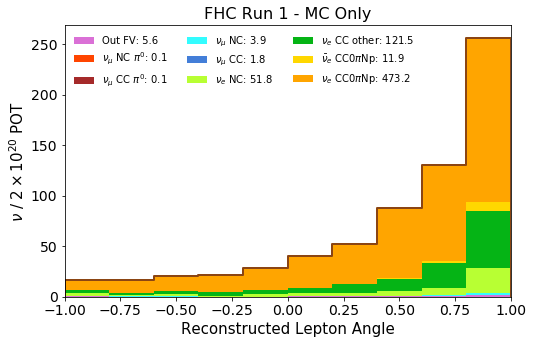

In [43]:
fig = plt.figure(figsize=(8, 5))

n, b, p = plt.hist([datasets_bdt['outfv'][xvar], 
                       datasets_bdt['infv'].query(nue_NC_Npi0)[xvar],
                       datasets_bdt['infv'].query(nue_CC_Npi0)[xvar],
                       datasets_bdt['infv'].query(nue_NC_0pi0)[xvar],
                       datasets_bdt['infv'].query(nue_CC_0pi0)[xvar],
                       datasets_bdt['infv'].query(numu_NC)[xvar],
                       datasets_bdt['infv'].query(numu_CCother)[xvar],
                       datasets_bdt['infv'].query(numubar_1eNp)[xvar], 
                       datasets_bdt['infv'].query(signal)[xvar]],
            bins, histtype='bar', range=[xlow, xhigh], stacked=True, 
            color=[labels['outfv'][1], 
                       labels['nue_NC_Npi0'][1], 
                       labels['nue_CC_Npi0'][1], 
                       labels['nue_NC_0pi0'][1], 
                       labels['nue_CC_0pi0'][1], 
                       labels['numu_NC'][1], 
                       labels['numu_CCother'][1],
                       labels['numubar_1eNp'][1], 
                       labels['signal'][1]], 
            label=[leg['outfv'], 
                   leg['nue_NC_Npi0'], 
                   leg['nue_CC_Npi0'], 
                   leg['nue_NC_0pi0'], 
                   leg['nue_CC_0pi0'], 
                   leg['numu_NC'], 
                   leg['numu_CCother'], 
                   leg['numubar_1eNp'], 
                   leg['signal']
                  ],
            weights=[datasets_bdt['outfv'].totweight_data, 
                     datasets_bdt['infv'].query(nue_NC_Npi0).totweight_data, 
                     datasets_bdt['infv'].query(nue_CC_Npi0).totweight_data,
                     datasets_bdt['infv'].query(nue_NC_0pi0).totweight_data,
                     datasets_bdt['infv'].query(nue_CC_0pi0).totweight_data,
                     datasets_bdt['infv'].query(numu_NC).totweight_data,
                     datasets_bdt['infv'].query(numu_CCother).totweight_data,
                     datasets_bdt['infv'].query(numubar_1eNp).totweight_data,
                     datasets_bdt['infv'].query(signal).totweight_data 
                     ])

#This is not how to jump to get one value! You want to sum the columns not the rows!
print(n[-1])
print(sum(n[-1]))
#print(sum(sum(n)))

#print(len(datasets_bdt['infv'].query(signal)[xvar]))
#print(len(datasets_bdt['infv'].query(signal).totweight_data))

#if useWeights == False:
#    nuWro_stat_err_numu = n[-1]


# simulation outline 
tot = list([0, n[-1][0]])+list(n[-1])+[0]
b_step = list([b[0]])+list(b)+list([b[-1]])
plt.step(b_step, tot, color='saddlebrown', linewidth=2)

# plot format stuff
plt.legend(loc='best', prop={"size":10}, ncol=3, frameon=False)


    
plt.xlabel("Reconstructed "+x_label, fontsize=15)

#plt.xticks(x_ticks, fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(xlow, xhigh)
#plt.ylim(0, 30)

if not ISRUN3: 
    plt.title("FHC Run 1 - MC Only", fontsize=16)
    plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
else: 
    plt.title("RHC Run 3 - MC Only", fontsize=16)
    plt.ylabel('$\\nu$ / $5\\times10^{20}$ POT', fontsize=15)

##plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_evt_rate_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()
          

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([ 224.6305589 ,  247.73406233,  287.83613845,  332.36727161,
        419.89611366,  472.06842169,  606.3464843 ,  843.02289316,
       1339.04765564, 3275.12028823])]


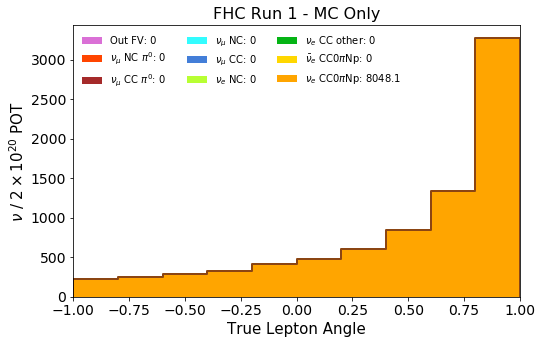

In [41]:
#TRUE BINS

fig = plt.figure(figsize=(8, 5))

n, b, p = plt.hist([datasets_bdt['outfv'][true_var], 
                       datasets_bdt['infv'].query(nue_NC_Npi0)[true_var],
                       datasets_bdt['infv'].query(nue_CC_Npi0)[true_var],
                       datasets_bdt['infv'].query(nue_NC_0pi0)[true_var],
                       datasets_bdt['infv'].query(nue_CC_0pi0)[true_var],
                       datasets_bdt['infv'].query(numu_NC)[true_var],
                       datasets_bdt['infv'].query(numu_CCother)[true_var],
                       datasets_bdt['infv'].query(numubar_1eNp)[true_var], 
                       datasets_bdt['infv'].query(signal)[true_var]],
            bins, histtype='bar', range=[xlow, xhigh], stacked=True, 
            color=[labels['outfv'][1], 
                       labels['nue_NC_Npi0'][1], 
                       labels['nue_CC_Npi0'][1], 
                       labels['nue_NC_0pi0'][1], 
                       labels['nue_CC_0pi0'][1], 
                       labels['numu_NC'][1], 
                       labels['numu_CCother'][1],
                       labels['numubar_1eNp'][1], 
                       labels['signal'][1]], 
            label=[leg['outfv'], 
                   leg['nue_NC_Npi0'], 
                   leg['nue_CC_Npi0'], 
                   leg['nue_NC_0pi0'], 
                   leg['nue_CC_0pi0'], 
                   leg['numu_NC'], 
                   leg['numu_CCother'], 
                   leg['numubar_1eNp'], 
                   leg['signal']
                  ],
            weights=[datasets_bdt['outfv'].totweight_data, 
                     datasets_bdt['infv'].query(nue_NC_Npi0).totweight_data, 
                     datasets_bdt['infv'].query(nue_CC_Npi0).totweight_data,
                     datasets_bdt['infv'].query(nue_NC_0pi0).totweight_data,
                     datasets_bdt['infv'].query(nue_CC_0pi0).totweight_data,
                     datasets_bdt['infv'].query(numu_NC).totweight_data,
                     datasets_bdt['infv'].query(numu_CCother).totweight_data,
                     datasets_bdt['infv'].query(numubar_1eNp).totweight_data,
                     datasets_bdt['infv'].query(signal).totweight_data 
                     ])

print(n)
#print(sum(n))
#print(sum(n[-1]))
#print(sum(sum(n)))

#inTruth = True

#if useWeights == False and inTruth == True:
#    nuWro_stat_err_numu_inTruth = sum(n)


# simulation outline 
tot = list([0, n[-1][0]])+list(n[-1])+[0]
b_step = list([b[0]])+list(b)+list([b[-1]])
plt.step(b_step, tot, color='saddlebrown', linewidth=2)

# plot format stuff
plt.legend(loc='best', prop={"size":10}, ncol=3, frameon=False)


    
plt.xlabel("True "+x_label, fontsize=15)

#plt.xticks(x_ticks, fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(xlow, xhigh)
#plt.ylim(0, 30)

if not ISRUN3: 
    plt.title("FHC Run 1 - MC Only", fontsize=16)
    plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
else: 
    plt.title("RHC Run 3 - MC Only", fontsize=16)
    plt.ylabel('$\\nu$ / $5\\times10^{20}$ POT', fontsize=15)

##plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_evt_rate_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()

In [44]:
ending = "Jan19"

#if inTruth == True:
#    print(nuWro_stat_err_numu_inTruth)

#    np.savetxt("numu_nuWro_stat_err_inTruth_"+ending+".csv", 
#               nuWro_stat_err_numu_inTruth,
#               delimiter =", ", 
#               fmt ='% s')

In [44]:
nuwro

True

In [45]:
selected_events = pd.concat([datasets_bdt['outfv'], datasets_bdt['infv']])
#print(selected_events)

tot_signal_weighted = np.nansum(selected_events.query('is_signal==True')['totweight_data'])
print('total signal events = '+ str(tot_signal_weighted))

tot_signal_weighted = np.nansum(selected_events['totweight_data'])
print('total signal events = '+ str(tot_signal_weighted))

total signal events = 473.15817482100346
total signal events = 669.7602266903923


669.7602266903854


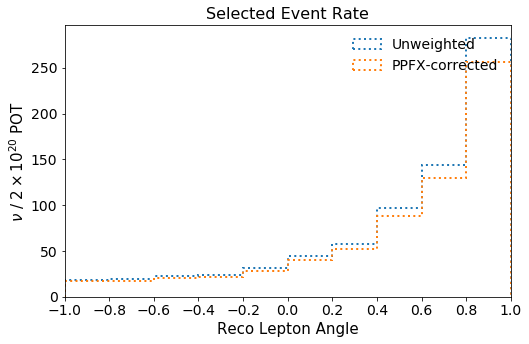

In [46]:


#RECO VAR

# ppfx correction effect 
fig = plt.figure(figsize=(8, 5))

plt.hist(selected_events[xvar], bins, range=[xlow, xhigh],
            weights=selected_events.pot_scale, linestyle=":", linewidth=2, histtype='step', 
                  label='Unweighted')

test = plt.hist(selected_events[xvar], bins, range=[xlow, xhigh],
            weights=selected_events.totweight_data, linestyle=":", linewidth=2, histtype='step', 
                  label='PPFX-corrected')

print(sum(test[0]))

# plot format stuff
plt.legend(loc='best', prop={"size":14}, ncol=1, frameon=False)

plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
    
plt.xlabel("Reco "+x_label, fontsize=15)
plt.xticks(x_ticks, fontsize=14)

plt.yticks(fontsize=14)

plt.xlim(xlow, xhigh)
plt.title("Selected Event Rate", fontsize=16)

plt.show()



[ 224.6305589   247.73406233  287.83613845  332.36727161  419.89611366
  472.06842169  606.3464843   843.02289316 1339.04765564 3275.12028823]
8048.069887976835


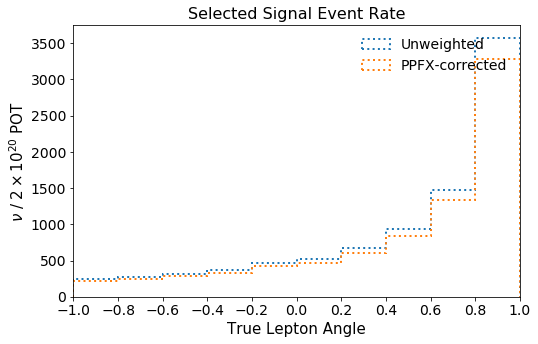

In [45]:
#TRUE VAR


# ppfx correction effect 
fig = plt.figure(figsize=(8, 5))

plt.hist(selected_events.query('is_signal==True')[true_var], bins, range=[xlow, xhigh],
            weights=selected_events.query('is_signal==True').pot_scale, linestyle=":", linewidth=2, histtype='step', 
                  label='Unweighted')

true_nuWro = plt.hist(selected_events.query('is_signal==True')[true_var], bins, range=[xlow, xhigh],
            weights=selected_events.query('is_signal==True').totweight_data, linestyle=":", linewidth=2, histtype='step', 
                  label='PPFX-corrected')

print(true_nuWro[0])
print(sum(true_nuWro[0]))


# plot format stuff
plt.legend(loc='best', prop={"size":14}, ncol=1, frameon=False)

plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
    
plt.xlabel("True "+x_label, fontsize=15)
plt.xticks(x_ticks, fontsize=14)

plt.yticks(fontsize=14)

plt.xlim(xlow, xhigh)
plt.title("Selected Signal Event Rate", fontsize=16)

plt.show()


In [47]:
print("True nuWro for comparison: ", true_nuWro[0])

NameError: name 'true_nuWro' is not defined

In [47]:
ending = "Jan19"

if isTruth == True:
    np.savetxt("numu_nuWro_prior_true_run1_angle_"+ending+".csv", 
               true_nuWro[0],
               delimiter =", ", 
               fmt ='% s')

GENIE bkg subtractions

In [48]:
ending = "Jan19"

In [49]:

numu_bkg_noExt = pd.read_csv("numu_nopions_angleDiff_usingSelection_run1_cv_numu_bkg_noExt_noDirt_"+ending+".csv", header=None)

print(numu_bkg_noExt.values[:, 0])
##########################

numu_evt_rate = pd.read_csv("numu_nopions_angleDiff_usingSelection_run1_cv_numu_evt_rate_"+ending+".csv", header=None)

numu_evt_rate = numu_evt_rate.values[:, 0]
print(numu_evt_rate)

#########################

numu_full_evt_rate = pd.read_csv("numu_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_recoCut_run1_"+ending+".csv", header=None)

numu_full_evt_rate = numu_full_evt_rate.values[:, 0]
print(numu_full_evt_rate)

[  6.83542782   3.25586767   2.37208443   3.90221426   5.55632557
   7.56255913  12.09014569  20.10811862  42.65903154 102.48231097]
[ 10.76224571   8.31618905  11.56670816  17.09151497  21.30187051
  24.42697272  38.79591105  56.15169065  88.97360636 168.48179629]
[ 245.66559597  269.61700172  287.50397432  353.15766421  405.08893046
  500.16097136  624.32730455  849.56460461 1388.92555392 3485.15897019]


[ 16.81038722  17.00270587  20.70223589  21.23257356  28.24756849
  40.32534936  51.77037053  87.65501276 130.07396902 255.940054  ]


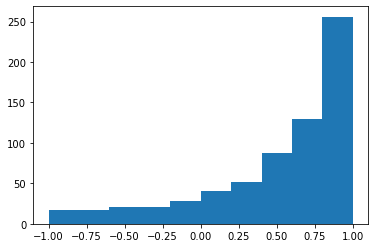

In [50]:


n, b, p = plt.hist(selected_events[xvar], bins, range=[xlow, xhigh],
            weights=selected_events.totweight_data)
#plt.close()

print(n)

In [51]:
len(n)

10

In [52]:
bincenters

array([-0.9, -0.7, -0.5, -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9])

In [53]:


binwidth = []

for x in range(len(bincenters)):
    
    if xvar=='tksh_angle': 
        binwidth.append(round(abs((x_ticks)[x+1]-(x_ticks)[x])/2, 2))
        
    else: 
        binwidth.append(round(abs((x_ticks+[xhigh])[x+1]-(x_ticks+[xhigh])[x])/2, 2))
    
binwidth



[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [54]:
## do not include EXT background subtraction! MC only 
#cv_bkgd_mc = [a-b for a,b in zip(fhc_dict['cv_bkgd'], fhc_dict['cv_ext'])]
#I already do not in what has been loaded in

cv_bkgd_mc = numu_bkg_noExt.values[:, 0]

In [55]:
cv_bkgd_mc

array([  6.83542782,   3.25586767,   2.37208443,   3.90221426,
         5.55632557,   7.56255913,  12.09014569,  20.10811862,
        42.65903154, 102.48231097])

In [56]:
#ALLSEL NUWRO

# background subtracted event rate - EXT was never added so never subtracted
#(still need to take into acct its uncertainty)
nuwro_evt_rate = [a-b for a,b in zip(n,cv_bkgd_mc)]


In [57]:
len(nuwro_evt_rate)

10

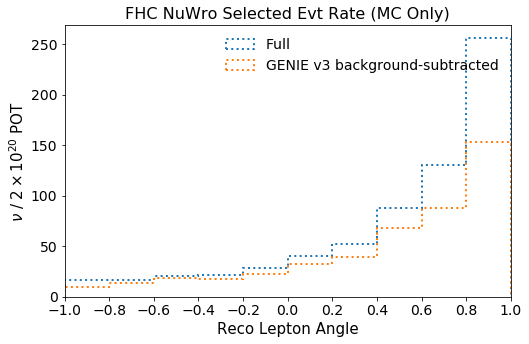

In [58]:
fig = plt.figure(figsize=(8, 5))

plt.hist(selected_events[xvar],
            bins, histtype='step', range=[xlow, xhigh],
            weights=selected_events.totweight_data, linestyle=":", linewidth=2, 
                  label='Full')

plt.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=nuwro_evt_rate, linestyle=":", linewidth=2, 
                  label='GENIE v3 background-subtracted')

# plot format stuff
plt.legend(loc='best', prop={"size":14}, ncol=1, frameon=False)

plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
    
plt.xlabel("Reco "+x_label, fontsize=15)
plt.xticks(x_ticks, fontsize=14)

plt.yticks(fontsize=14)
#plt.ylim(0, 7)

plt.xlim(xlow, xhigh)
plt.title("FHC NuWro Selected Evt Rate (MC Only)", fontsize=16)

plt.show()


(array([ 16.81038722,  17.00270587,  20.70223589,  21.23257356,
         28.24756849,  40.32534936,  51.77037053,  87.65501276,
        130.07396902, 255.940054  ]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01,  1.00000000e+00]),
 <a list of 1 Patch objects>)

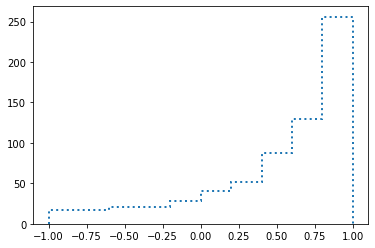

In [59]:
plt.hist(selected_events[xvar],
            bins, histtype='step', range=[xlow, xhigh],
            weights=selected_events.totweight_data, linestyle=":", linewidth=2, 
                  label='Full')

In [60]:
sum(nuwro_evt_rate)

462.93614099486734

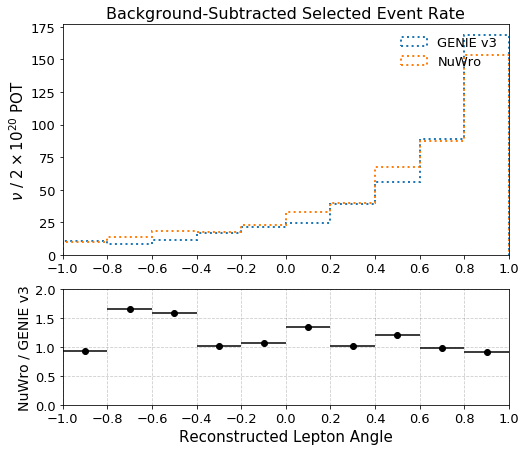

In [61]:
from matplotlib import gridspec

fig = plt.figure(figsize=(8, 7))

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
    
ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)

ax2.yaxis.grid(linestyle="--", color='black', alpha=0.2)
ax2.xaxis.grid(linestyle="--", color='black', alpha=0.2)

# background subtracted genie evt rate 
ax1.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=numu_evt_rate, linestyle=":", linewidth=2, 
                  label='GENIE v3')

# background subtracted nuwro evt rate
ax1.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=nuwro_evt_rate, linestyle=":", linewidth=2, 
                  label='NuWro')

# ratio plot  
ax2.errorbar(bincenters, [a/b for a,b in zip(nuwro_evt_rate, numu_evt_rate)], 
             xerr=binwidth, color="black", fmt='o')
ax2.set_ylim(0, 2)


# plot formatting 
ax1.set_xlim(xlow,xhigh)
ax1.set_xticks(x_ticks)
ax1.set_ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)

ax2.set_xlim(xlow,xhigh)
ax2.set_xticks(x_ticks)

ax2.set_xlabel(x_label, fontsize=14)
ax2.set_ylabel("NuWro / GENIE v3", fontsize=14)

ax1.legend(fontsize=13, frameon=False)
    
ax2.set_xlabel("Reconstructed "+x_label, fontsize=15)
ax1.set_title("Background-Subtracted Selected Event Rate", fontsize=16)

#if ISRUN3=='': 
#    plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/combined/combined_"+xvar+"_closuretest.pdf", 
#            transparent=True, bbox_inches='tight')

#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_evt_rate_compare_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')
plt.show()

In [62]:


# nuwro selected neutrino backgrounds
nuwro_bkgd = pd.concat([datasets_bdt['infv'].query('is_signal==False'), datasets_bdt['outfv']])



In [63]:
nuwro_evt_rate

[9.974959394559665,
 13.746838195408325,
 18.330151464022187,
 17.330359303185205,
 22.69124292648498,
 32.76279022496868,
 39.6802248389629,
 67.54689414113017,
 87.41493747852056,
 153.45774302762464]

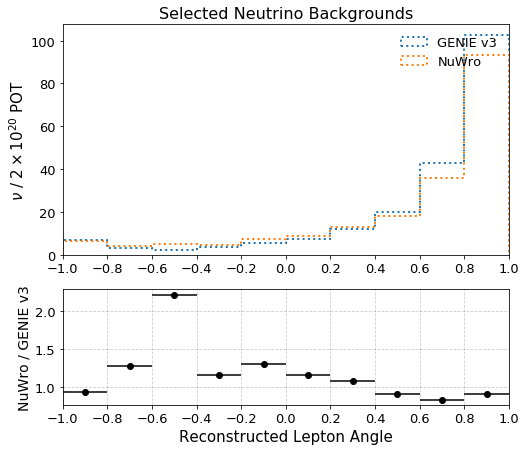

In [64]:
fig = plt.figure(figsize=(8, 7))

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
    
ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)

ax2.yaxis.grid(linestyle="--", color='black', alpha=0.2)
ax2.xaxis.grid(linestyle="--", color='black', alpha=0.2)

# genie
ax1.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=cv_bkgd_mc, linestyle=":", linewidth=2, 
                  label='GENIE v3')

# background subtracted nuwro evt rate
h_nuwro_bkgd = ax1.hist(nuwro_bkgd[xvar], bins, histtype='step', 
                        weights=nuwro_bkgd.totweight_data, range=[xlow,xhigh], 
         linestyle=":", linewidth=2, 
                  label='NuWro')[0]

# ratio plot  
ax2.errorbar(bincenters, [a/b for a,b in zip(h_nuwro_bkgd, cv_bkgd_mc)], 
             xerr=binwidth, color="black", fmt='o')
#ax2.set_ylim(0, 2)

#ax1.set_ylim(0, 5)


# plot formatting 
ax1.set_xlim(xlow,xhigh)
ax1.set_xticks(x_ticks)
ax1.set_ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)

ax2.set_xlim(xlow,xhigh)
ax2.set_xticks(x_ticks)

ax2.set_xlabel(x_label, fontsize=14)
ax2.set_ylabel("NuWro / GENIE v3", fontsize=14)

ax1.legend(fontsize=13, frameon=False)
    
ax2.set_xlabel("Reconstructed "+x_label, fontsize=15)
ax1.set_title("Selected Neutrino Backgrounds", fontsize=16)


#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_mc_bkgd_compare_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()

In [65]:
#This should be prior true signal from genie
#genie_true = generated_signal(False, true_var, bins, xlow, xhigh)[0]

genie_true = numu_full_evt_rate

print(genie_true)

[ 245.66559597  269.61700172  287.50397432  353.15766421  405.08893046
  500.16097136  624.32730455  849.56460461 1388.92555392 3485.15897019]


[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
[ 13.91937288  22.90812373  18.15357576  25.10463963  25.93657553
  32.17646128  42.52234188  69.35484966  89.88580852 133.19642595]


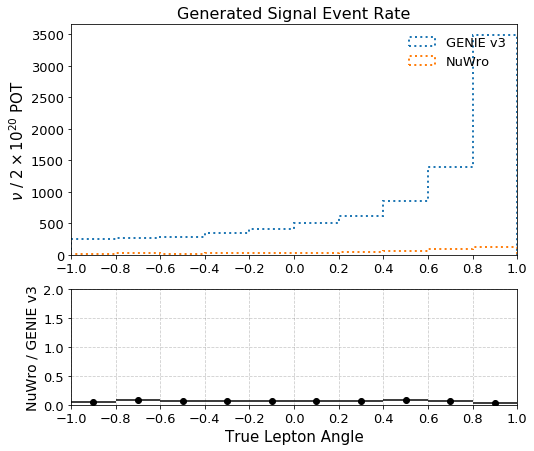

In [66]:
fig = plt.figure(figsize=(8, 7))

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
    
ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)

ax2.yaxis.grid(linestyle="--", color='black', alpha=0.2)
ax2.xaxis.grid(linestyle="--", color='black', alpha=0.2)

ax1.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=genie_true, linestyle=":", linewidth=2, 
                  label='GENIE v3')

print(bincenters)

nuwro_true = ax1.hist(generated_events.query('is_signal==True')[true_var], bins, 
                      histtype='step', range=[xlow,xhigh], 
                      weights=generated_events.query('is_signal==True')['totweight_data'], 
                      linestyle=":", linewidth=2, 
                  label='NuWro')[0]


# ratio plot  
ax2.errorbar(bincenters, [a/b for a,b in zip(nuwro_true, genie_true)], 
             xerr=binwidth, color="black", fmt='o')
ax2.set_ylim(0, 2)

print(nuwro_true)

# plot formatting 
ax1.set_xlim(xlow,xhigh)
ax1.set_xticks(x_ticks)
ax1.set_ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)

ax2.set_xlim(xlow,xhigh)
ax2.set_xticks(x_ticks)

ax2.set_xlabel(x_label, fontsize=14)
ax2.set_ylabel("NuWro / GENIE v3", fontsize=14)

ax1.legend(fontsize=13, frameon=False)
    
ax2.set_xlabel("True "+x_label, fontsize=15)
ax1.set_title("Generated Signal Event Rate", fontsize=16)

#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_gen_signal_compare_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')
plt.show()

Generated (True - GENIE v3) =  [ 245.66559597  269.61700172  287.50397432  353.15766421  405.08893046
  500.16097136  624.32730455  849.56460461 1388.92555392 3485.15897019]
Selected (Reco - NuWro) =  [9.974959394559665, 13.746838195408325, 18.330151464022187, 17.330359303185205, 22.69124292648498, 32.76279022496868, 39.6802248389629, 67.54689414113017, 87.41493747852056, 153.45774302762464]


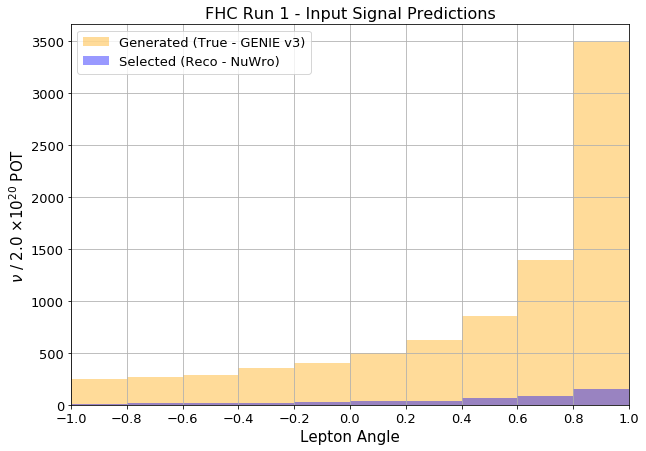

In [67]:
# nuwro input distributions 

fig = plt.figure(figsize=(10, 7))

#So this is Prior True
plt.hist(bincenters, bins, color='orange', label='Generated (True - GENIE v3)', alpha=0.4, 
         weights=genie_true)

print("Generated (True - GENIE v3) = ", genie_true)


#And this is Data Signal
# genie background subtracted evt rate 
plt.hist(bincenters, bins, color='blue', label='Selected (Reco - NuWro)', alpha=0.4, weights=nuwro_evt_rate)

print('Selected (Reco - NuWro) = ', nuwro_evt_rate)

plt.legend(fontsize=13)
plt.title('FHC Run 1 - Input Signal Predictions', fontsize=16)

plt.xlim(xlow, xhigh)

plt.xlabel(x_label, fontsize=15)
    
plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.ylabel("$\\nu$ / 2.0 $\\times 10^{20}$ POT", fontsize=15)

plt.grid()

#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_input_dist_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()

In [68]:
nuwro_evt_rate

[9.974959394559665,
 13.746838195408325,
 18.330151464022187,
 17.330359303185205,
 22.69124292648498,
 32.76279022496868,
 39.6802248389629,
 67.54689414113017,
 87.41493747852056,
 153.45774302762464]

In [69]:
##ALLSEL NUWRO STAT ERRS

# sumw2 of the full event rate 
nuwro_full_sumw2 = []

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    nuwro_full_sumw2.append(sum(selected_events.query(bin_query).totweight_data ** 2))
    #nuwro_full_sumw2.append(sum(nue.query(bin_query).totweight_data ** 2))
    
    
print(nuwro_full_sumw2)   
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )

[4.470166660908858, 4.531339244349231, 5.563543706772289, 5.716721146381857, 7.627070355328702, 10.88087032268941, 13.956345890910479, 23.67322059035615, 35.16595749931822, 69.38940010732162]


In [70]:
nuwro_full_sumw2

[4.470166660908858,
 4.531339244349231,
 5.563543706772289,
 5.716721146381857,
 7.627070355328702,
 10.88087032268941,
 13.956345890910479,
 23.67322059035615,
 35.16595749931822,
 69.38940010732162]

Signal Region Systematic - NuWro

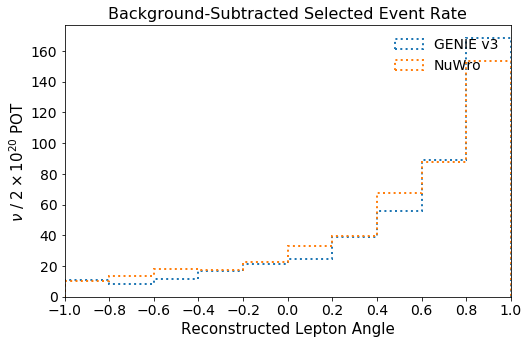

In [71]:
# genie vs nuwro event rate

fig = plt.figure(figsize=(8, 5))

# background subtracted genie evt rate 
plt.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=numu_evt_rate, linestyle=":", linewidth=2, 
                  label='GENIE v3')

# background subtracted nuwro evt rate
plt.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=nuwro_evt_rate, linestyle=":", linewidth=2, 
                  label='NuWro')

# plot format stuff
plt.legend(loc='best', prop={"size":14}, ncol=1, frameon=False)

plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
    
plt.xlabel("Reconstructed "+x_label, fontsize=15)
plt.xticks(x_ticks, fontsize=14)

plt.yticks(fontsize=14)

plt.xlim(xlow, xhigh)


plt.title("Background-Subtracted Selected Event Rate", fontsize=16)

plt.show()

In [72]:
# genie_evt_rate - background subtracted event rate 
# nuwro_evt_rate - background subtracted event rate 
# genie_nu_bkgd - neutrino background prediction from genie 
# nuwro_nu_bkgd - neutrino background prediction from nuwro

sys_dict = {}



In [73]:
sys_dict['genie_evt_rate'] = numu_evt_rate
sys_dict['nuwro_evt_rate'] = nuwro_evt_rate
sys_dict['genie_nu_bkgd'] = cv_bkgd_mc
sys_dict['nuwro_nu_bkgd'] = list(h_nuwro_bkgd)


In [74]:
np.savetxt("numu_nuWro_MC_Data_Signal_recoCut_run1_angle_"+ending+".csv", 
           nuwro_evt_rate,
           delimiter =", ", 
           fmt ='% s')

In [75]:
nuwro_true

array([ 13.91937288,  22.90812373,  18.15357576,  25.10463963,
        25.93657553,  32.17646128,  42.52234188,  69.35484966,
        89.88580852, 133.19642595])

In [76]:
genie_true

array([ 245.66559597,  269.61700172,  287.50397432,  353.15766421,
        405.08893046,  500.16097136,  624.32730455,  849.56460461,
       1388.92555392, 3485.15897019])

## Create the Numu Cov Uncertainty Matrix

In [77]:
#nuWro_stat_err_numu
#array([ 5.3487608 ,  5.52786268,  6.70549925,  6.97774993,  9.33344634,
#       12.95879938, 16.85555654, 28.36305774, 41.59580091, 77.48407289])

nuWro_stat_err_numu = nuwro_full_sumw2
print(nuWro_stat_err_numu)

[4.470166660908858, 4.531339244349231, 5.563543706772289, 5.716721146381857, 7.627070355328702, 10.88087032268941, 13.956345890910479, 23.67322059035615, 35.16595749931822, 69.38940010732162]


In [78]:
numu_bkg_genie_err = pd.read_csv("numu_bkg_exp_err_squared_angle_"+ending+".csv", header=None)

numu_bkg_genie_err = numu_bkg_genie_err.values[:, 0]
print(numu_bkg_genie_err)

[ 0.6154491   0.27349356  1.32318578  0.34879157  0.50934191  6.26401116
  7.33086553  9.25849583  9.45826607 16.55835356]


In [79]:
totalstat_numu_err = nuWro_stat_err_numu + numu_bkg_genie_err
print(totalstat_numu_err)

[ 5.08561576  4.8048328   6.88672948  6.06551272  8.13641226 17.14488148
 21.28721142 32.93171642 44.62422357 85.94775366]


In [80]:
numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [81]:
numu_cov_stats[np.diag_indices_from(numu_cov_stats)]    = totalstat_numu_err

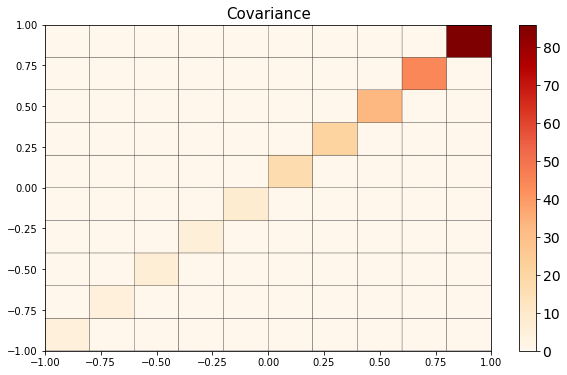

In [82]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_cov_stats, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [83]:
# Now need to load in the genie sys errs from numu

numu_bkg_genie_err = pd.read_csv("numu_cov_genie_only_angle_"+ending+".csv", header=None)

numu_bkg_genie_err = numu_bkg_genie_err.values
print(numu_bkg_genie_err)

[[ 5.46530673e+00  3.00076940e+00  3.51204976e+00  5.66895466e+00
   6.64143364e+00  8.35034256e+00  1.39233213e+01  1.95142276e+01
   3.48928732e+01  7.60166345e+01]
 [ 3.00076940e+00  3.93550772e+00  3.42110002e+00  2.39806200e+00
   4.11879378e+00  5.94467628e+00  2.55313940e+00  6.33474945e+00
   7.73076690e+00 -2.02996323e+01]
 [ 3.51204976e+00  3.42110002e+00  3.60898725e+00  3.67474893e+00
   5.13594960e+00  6.80479378e+00  6.49669180e+00  1.10572350e+01
   1.74155708e+01  1.26067574e+01]
 [ 5.66895466e+00  2.39806200e+00  3.67474893e+00  7.59932973e+00
   8.09644534e+00  9.47376274e+00  1.92609584e+01  2.55720566e+01
   4.64643462e+01  1.18774385e+02]
 [ 6.64143364e+00  4.11879378e+00  5.13594960e+00  8.09644534e+00
   9.73549991e+00  1.18004674e+01  1.89750121e+01  2.69264771e+01
   4.70411529e+01  9.91738577e+01]
 [ 8.35034256e+00  5.94467628e+00  6.80479378e+00  9.47376274e+00
   1.18004674e+01  1.64259353e+01  2.14481580e+01  3.31002227e+01
   5.83865396e+01  1.04671531e+02

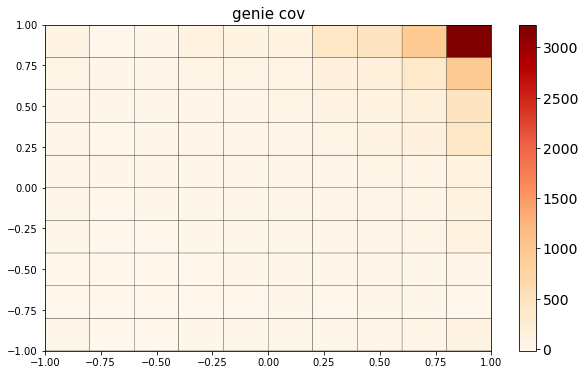

In [84]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_bkg_genie_err, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('genie cov', fontsize=15)

plt.show()

In [85]:
total_cov_nuWro_numu = numu_bkg_genie_err + numu_cov_stats

In [86]:
np.savetxt("data_covmat_numu_MC_nuWro_input_angle_"+ending+".csv", 
           total_cov_nuWro_numu,
           delimiter =", ", 
           fmt ='% s')

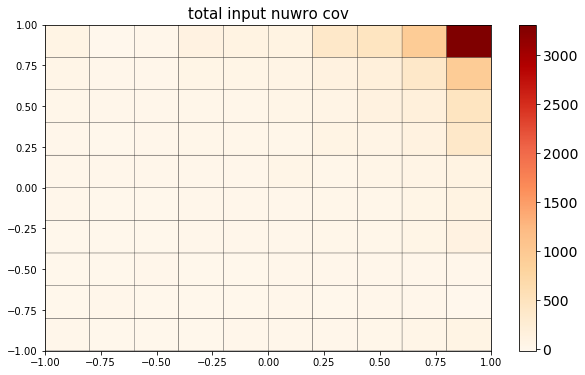

In [87]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cov_nuWro_numu, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('total input nuwro cov', fontsize=15)

plt.show()

In [88]:
total_cor_nuWro_numu = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_cov_nuWro_numu)): 
        for j in range(len(total_cov_nuWro_numu[i])): 

            if np.sqrt(total_cov_nuWro_numu[i][i])*np.sqrt(total_cov_nuWro_numu[j][j]) != 0: 
                total_cor_nuWro_numu[i][j] = total_cov_nuWro_numu[i][j] / (np.sqrt(total_cov_nuWro_numu[i][i])*np.sqrt(total_cov_nuWro_numu[j][j]))
                
print("")
print(total_cor_nuWro_numu)


[[1.0, 0.31248072183846337, 0.3337408694772332, 0.47212332050279576, 0.48364990944753555, 0.4436884481352229, 0.48865423496552135, 0.5313309007138983, 0.5416373155286655, 0.4066553635577556], [0.31248072183846337, 1.0, 0.357186918307943, 0.21942894588277484, 0.3295492751724846, 0.347042832525467, 0.09844969838794303, 0.18950653515257615, 0.1318485820025019, -0.11931281070204805], [0.3337408694772332, 0.357186918307943, 1.0, 0.30684518130691635, 0.37499820785897686, 0.3625166548371444, 0.22860738374615353, 0.30185572205021177, 0.2710495708890398, 0.06761770538043958], [0.47212332050279576, 0.21942894588277484, 0.30684518130691635, 1.0, 0.5180916147036281, 0.44232270823462455, 0.5939906637679107, 0.6118180262145847, 0.6337742317538053, 0.5583204780435421], [0.48364990944753555, 0.3295492751724846, 0.37499820785897686, 0.5180916147036281, 0.9999999999999998, 0.4817622257843087, 0.5116825318222306, 0.5633171211927308, 0.56106025937581, 0.40763810959404123], [0.4436884481352229, 0.34704283

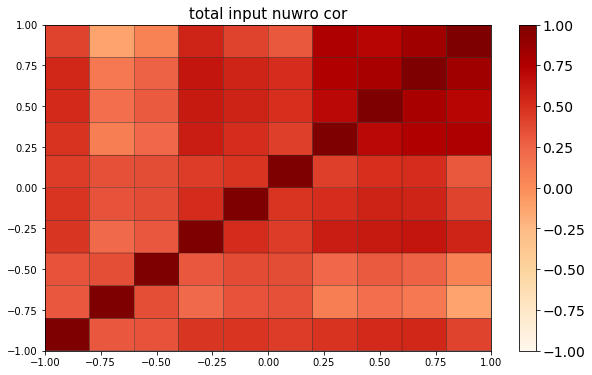

In [89]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cor_nuWro_numu, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('total input nuwro cor', fontsize=15)

plt.show()

In [90]:
total_frac_cov_nuWro_numu = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_cov_nuWro_numu[i][j]
        
        if nuwro_evt_rate[i]*nuwro_evt_rate[j] != 0:
            total_frac_cov_nuWro_numu[i][j] = c/(nuwro_evt_rate[i]*nuwro_evt_rate[j])

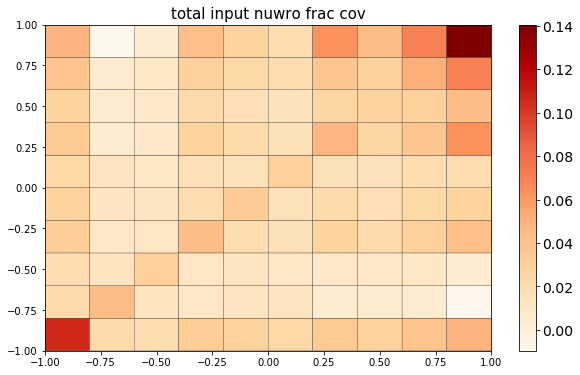

In [91]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_frac_cov_nuWro_numu, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('total input nuwro frac cov', fontsize=15)

plt.show()

## Now make the inputs blockwise

In [92]:
nue_data_signal = pd.read_csv("nue_nuWro_MC_Data_Signal_recoCut_run1_angle_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)

[-0.1578482   0.91873663  0.95584798  0.75860907  2.19900006  3.51811841
  3.15922008  6.62676529 11.40835886 20.9548115 ]


In [93]:
nue_numu_tot = np.concatenate((nue_data_signal, nuwro_evt_rate), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))


[ -0.1578482    0.91873663   0.95584798   0.75860907   2.19900006
   3.51811841   3.15922008   6.62676529  11.40835886  20.9548115
   9.97495939  13.7468382   18.33015146  17.3303593   22.69124293
  32.76279022  39.68022484  67.54689414  87.41493748 153.45774303]
20


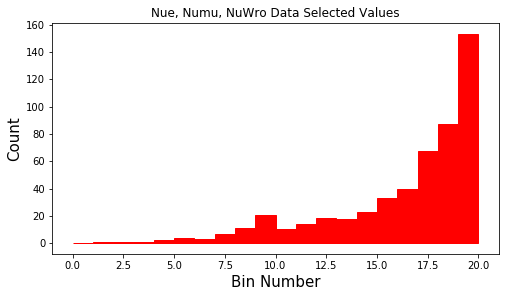

In [94]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, NuWro Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_nuWro_input_angleDiff_comb_"+ending+".svg", bbox_inches='tight')

np.savetxt("data_signal_MC_nuWro_input_angleDiff_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

In [95]:
# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_angle_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[ 3.10700935e-02  1.72159582e-02  1.92897371e-02  1.30306764e-02
   3.29441453e-02  4.62675382e-02  6.22914788e-02  8.44944113e-02
   8.74655457e-02 -9.42927463e-02  2.47992484e-01  2.41423859e-01
   2.12048179e-01  1.77100082e-01  2.90574707e-01  3.97745943e-01
   3.05550941e-01  5.95569754e-01  8.79479747e-01 -1.72857368e-02]
 [ 1.72159582e-02  2.03931555e-02  2.22912738e-02  1.79755924e-02
   3.33229154e-02  5.16960369e-02  7.10248936e-02  9.56617234e-02
   1.22120165e-01  3.42687961e-02  2.63247275e-01  2.50366383e-01
   2.38948434e-01  2.43337424e-01  3.43095397e-01  4.53964794e-01
   4.34058306e-01  6.97352259e-01  1.01527663e+00  5.88411491e-01]
 [ 1.92897371e-02  2.22912738e-02  3.92054558e-02  4.32552194e-02
   4.61514633e-02  7.69994701e-02  1.09941555e-01  1.67647239e-01
   2.88123143e-01  6.23714860e-01  4.10749202e-01  2.80656393e-01
   3.32442122e-01  4.46149093e-01  5.48455943e-01  6.80620773e-01
   9.78381149e-01  1.42685785e+00  2.47389879e+00  4.35472828e+00]
 [ 1.30

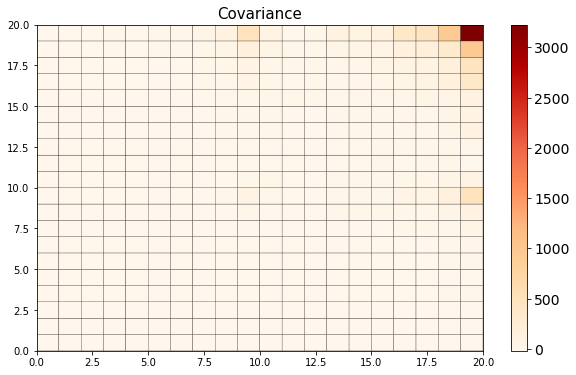

In [96]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 21, 1)
        
plt.pcolor(bins, bins, blockwise_genie_err, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


Now add in the Stat errs to the blockwise matrix

In [97]:
#nue_cov_mc_stat and numu_cov_mc_stat

totalstat_nue_err = pd.read_csv("totalstat_nuWro_nue_err_angle_"+ending+".csv", header=None)

totalstat_nue_err = totalstat_nue_err.values[:, 0]


nue_stats = totalstat_nue_err
numu_stats = totalstat_numu_err

nue_numu_stats = np.concatenate((nue_stats, numu_stats), axis=0)

print(nue_numu_stats)

[3.03191827e-02 1.61295022e-01 1.88687973e-01 7.35175176e-01
 3.74802604e-01 5.34796950e-01 1.76697554e-01 7.45456621e-01
 1.06783028e+00 2.77198529e+00 5.08561576e+00 4.80483280e+00
 6.88672948e+00 6.06551272e+00 8.13641226e+00 1.71448815e+01
 2.12872114e+01 3.29317164e+01 4.46242236e+01 8.59477537e+01]


In [98]:
nue_numu_nuWro_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_nuWro_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [99]:
nue_numu_nuWro_cov_stats[np.diag_indices_from(nue_numu_nuWro_cov_stats)]    = nue_numu_stats

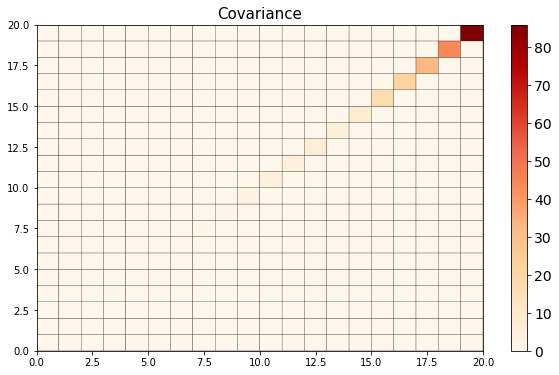

In [100]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_nuWro_cov_stats, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

#plt.savefig("blockwise_nuWro_cov_input.svg", bbox_inches='tight')

plt.show()

NuWro unisim

In [101]:
nuWro_unisim = pd.read_csv("nuWro_extra_unisim_uncertainties_angle_"+ending+".csv", header=None)

nuWro_unisim = nuWro_unisim.values
print(nuWro_unisim)

[[ 2.34642965e-01 -1.69364665e-01 -5.83222905e-02  1.32098287e-01
  -2.31006811e-01 -4.82344975e-01  2.38283536e-01 -5.59737812e-01
  -1.80925311e-02  2.60765517e+00  3.81361171e-01 -2.63060423e+00
  -3.27620918e+00 -1.15696096e-01 -6.73011432e-01 -4.03786660e+00
  -4.28361241e-01 -5.51983193e+00  7.55018570e-01  7.27764528e+00]
 [-1.69364665e-01  1.22246963e-01  4.20968734e-02 -9.53481902e-02
   1.66740099e-01  3.48155314e-01 -1.71992420e-01  4.04017257e-01
   1.30591406e-02 -1.88219854e+00 -2.75265474e-01  1.89876310e+00
   2.36475903e+00  8.35091329e-02  4.85777853e-01  2.91452132e+00
   3.09189999e-01  3.98419993e+00 -5.44970386e-01 -5.25298491e+00]
 [-5.83222905e-02  4.20968734e-02  1.44964481e-02 -3.28340320e-02
   5.74184966e-02  1.19890506e-01 -5.92271821e-02  1.39127083e-01
   4.49703597e-03 -6.48152491e-01 -9.47902145e-02  6.53856654e-01
   8.14326665e-01  2.87571430e-02  1.67282101e-01  1.00364240e+00
   1.06472439e-01  1.37199613e+00 -1.87665598e-01 -1.80891399e+00]
 [ 1.32

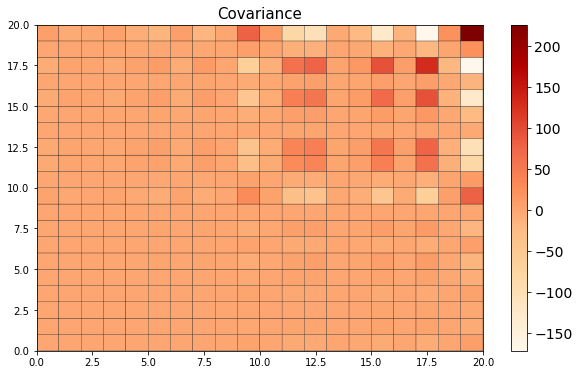

In [102]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 21, 1)
        
plt.pcolor(bins, bins, nuWro_unisim, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


Now make the total matrix

In [103]:
total_nuWro_input_cov = nue_numu_nuWro_cov_stats + blockwise_genie_err + nuWro_unisim

In [104]:
np.savetxt("data_covmat_MC_nuWro_input_angleDiff_comb_"+ending+".csv", 
           total_nuWro_input_cov,
           delimiter =", ", 
           fmt ='% s')

In [105]:
total_nuWro_input_cov = pd.read_csv("data_covmat_MC_nuWro_input_angleDiff_comb_"+ending+".csv", header=None)

total_nuWro_input_cov = total_nuWro_input_cov.values
print(total_nuWro_input_cov)

[[ 2.96032241e-01 -1.52148707e-01 -3.90325534e-02  1.45128963e-01
  -1.98062665e-01 -4.36077437e-01  3.00575015e-01 -4.75243401e-01
   6.93730146e-02  2.51336243e+00  6.29353655e-01 -2.38918037e+00
  -3.06416100e+00  6.14039858e-02 -3.82436724e-01 -3.64012066e+00
  -1.22810300e-01 -4.92426217e+00  1.63449832e+00  7.26035954e+00]
 [-1.52148707e-01  3.03935141e-01  6.43881472e-02 -7.73725978e-02
   2.00063014e-01  3.99851351e-01 -1.00967526e-01  4.99678980e-01
   1.35179306e-01 -1.84792974e+00 -1.20181991e-02  2.14912949e+00
   2.60370746e+00  3.26846557e-01  8.28873250e-01  3.36848612e+00
   7.43248305e-01  4.68155219e+00  4.70306242e-01 -4.66457342e+00]
 [-3.90325534e-02  6.43881472e-02  2.42389877e-01  1.04211874e-02
   1.03569960e-01  1.96889976e-01  5.07143728e-02  3.06774322e-01
   2.92620179e-01 -2.44376315e-02  3.15958987e-01  9.34513048e-01
   1.14676879e+00  4.74906236e-01  7.15738044e-01  1.68426317e+00
   1.08485359e+00  2.79885398e+00  2.28623319e+00  2.54581429e+00]
 [ 1.45

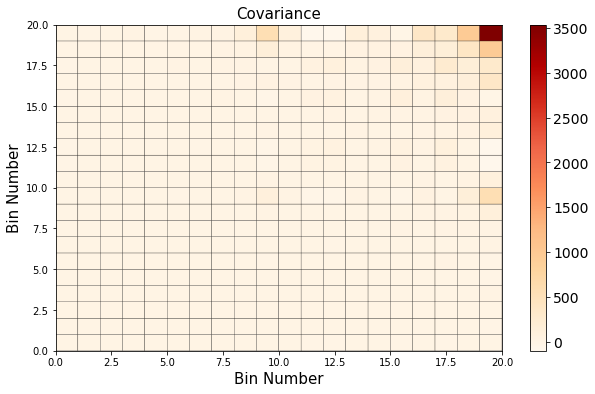

In [107]:
fig = plt.figure(figsize=(10, 6))
bins = np.arange(0, 21, 1)


plt.pcolor(bins, bins, total_nuWro_input_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlabel("Bin Number", fontsize=15)
plt.ylabel("Bin Number", fontsize=15)


#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.savefig("blockwise_nuWro_cov_input_angle_"+ending+".svg", bbox_inches='tight')

plt.show()